In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model
from keras import backend as B
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, MaxPooling2D, Activation, Conv2DTranspose
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import layers
from keras.regularizers import l2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
trdata = ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
traindata = trdata.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/Datasets/NEURO_CNN_CA_BM/',
                                       target_size = (128,128),
                                       batch_size = 8,
                                       class_mode = 'categorical')
tsdata = ImageDataGenerator(rotation_range=5,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1./255,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')
testdata = tsdata.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/Datasets/NEURO_CNN_CA_BM/',
                                      target_size=(128,128),
                                      batch_size = 8,
                                      class_mode = 'categorical')


Found 23928 images belonging to 36 classes.
Found 23928 images belonging to 36 classes.


In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters = 128,
                  kernel_size = (3,3),
                  padding = 'same',
                  input_shape = (128,128,3),
                  activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 256,
                  kernel_size = (3,3),
                  strides = (2,2),
                  dilation_rate = (1,1),
                  use_bias = True,
                  kernel_initializer='glorot_uniform',
                  bias_initializer='zeros',
                  activity_regularizer=l2(0.0002),
                  activation = 'relu'))
model2.add(Conv2D(filters = 512,
                  kernel_size = (3,3),
                  strides = (1,1),
                  dilation_rate = (1,1),
                  use_bias = True,
                  kernel_initializer='glorot_uniform',
                  bias_initializer='zeros',
                  activity_regularizer=l2(0.0002),
                  activation = 'relu'))
model2.add(Conv2D(filters = 512,
                  kernel_size = (3,3),
                  strides = (1,1),
                  dilation_rate = (1,1),
                  use_bias = True,
                  kernel_initializer='glorot_uniform',
                  bias_initializer='zeros',
                  activity_regularizer=l2(0.0001),
                  activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 256,
                  kernel_size = (3,3),
                  strides = (2,2),
                  dilation_rate = (1,1),
                  use_bias = True,
                  kernel_initializer='glorot_uniform',
                  bias_initializer='zeros',
                  activity_regularizer=l2(0.001),
                  activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Flatten())
model2.add(Dense(units = 1024,
                 activation = 'relu',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1024,
                 activation = 'relu',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 36,activation = "sigmoid"))


In [ ]:
model2.compile(optimizer = Adam(learning_rate = 0.0001,
                               beta_1 = 0.9,
                               beta_2 = 0.999,
                               epsilon = 1e-07),
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])


In [ ]:
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 256)       295168    
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 512)       1180160   
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 512)       2

In [ ]:
earlystop = EarlyStopping(monitor='loss',
                          min_delta = 0,
                          patience = 50,
                          verbose = 1,
                          mode = 'min')


In [ ]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy', 
                                  patience = 1, 
                                  verbose = 1, 
                                  factor = 0.9, 
                                  min_lr = 0.0001)


In [ ]:
%%time

hist2 = model2.fit(traindata,
                 steps_per_epoch = 250,
                 epochs = 1000,
                 validation_data = testdata,
                 validation_steps = 100,
                 callbacks = [learning_rate, earlystop],
                 verbose = 1)


Epoch 1/1000
250/250 [==============================] - 637s 3s/step - loss: 5.8973 - accuracy: 0.0535 - val_loss: 3.8226 - val_accuracy: 0.0362 - lr: 1.0000e-04
Epoch 2/1000
250/250 [==============================] - 552s 2s/step - loss: 4.3354 - accuracy: 0.0690 - val_loss: 4.3190 - val_accuracy: 0.0500 - lr: 1.0000e-04
Epoch 3/1000
250/250 [==============================] - 493s 2s/step - loss: 3.8370 - accuracy: 0.0895 - val_loss: 3.7702 - val_accuracy: 0.1075 - lr: 1.0000e-04
Epoch 4/1000
250/250 [==============================] - 430s 2s/step - loss: 3.5048 - accuracy: 0.1195 - val_loss: 3.1711 - val_accuracy: 0.1850 - lr: 1.0000e-04
Epoch 5/1000
250/250 [==============================] - 382s 2s/step - loss: 3.1727 - accuracy: 0.1860 - val_loss: 2.8151 - val_accuracy: 0.2750 - lr: 1.0000e-04
Epoch 6/1000
250/250 [==============================] - 346s 1s/step - loss: 2.9462 - accuracy: 0.2240 - val_loss: 2.4738 - val_accuracy: 0.3475 - lr: 1.0000e-04
Epoch 7/1000
250/250 [======

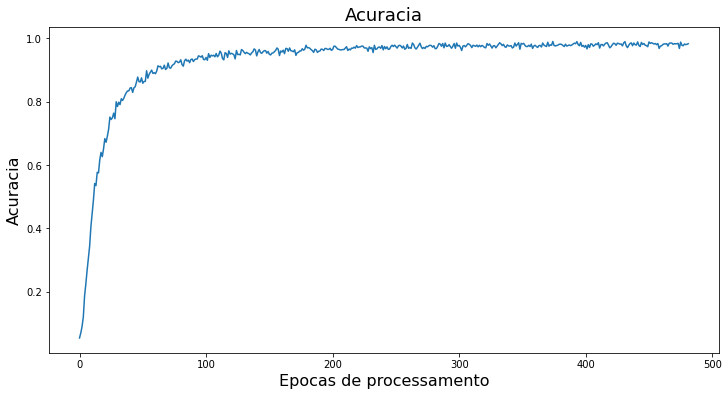

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist2.history['accuracy'])
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Acuracia', fontsize=16)
plt.title('Acuracia', fontsize=18)
plt.show()


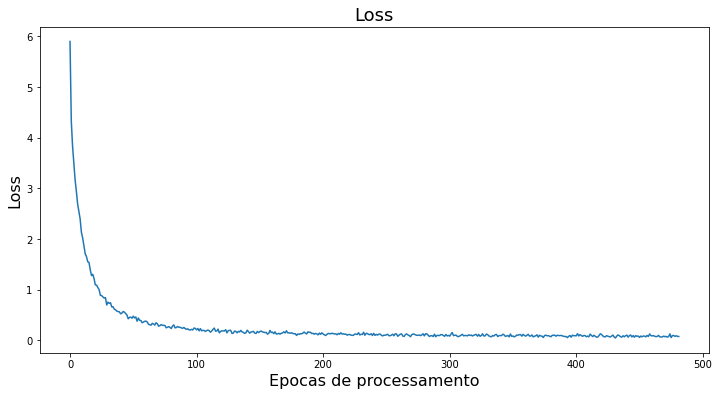

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist2.history['loss'])
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss', fontsize=18)
plt.show()


In [ ]:
model2.save_weights('/content/drive/MyDrive/Colab Notebooks/Datasets/NEURO_CNN_CA_BM/Neuro_CNN_Tumores_Cerebrais_RM_36c_weights.h5')
model2.save('/content/drive/MyDrive/Colab Notebooks/Datasets/NEURO_CNN_CA_BM/Neuro_CNN_Tumores_Cerebrais_RM_36c.h5')


In [ ]:
acc2 = hist2.history['accuracy'][-1] * 100
print(f'Acuracia: {acc2}%')


Acuracia: 98.35000038146973%


# Testes em Amostras

In [ ]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import backend as B
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import LayerNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, Conv2DTranspose
import keras.layers.convolutional as conv
import glob
import cv2


In [ ]:
model = Sequential()
model = load_model('/content/drive/MyDrive/NEURO_CNN/Neuro_CNN_Tumores_Cerebrais_RM_36c_95%+Acc.h5')
model.load_weights('/content/drive/MyDrive/NEURO_CNN/Neuro_CNN_Tumores_Cerebrais_RM_36c_95%+Acc_weights.h5')


In [ ]:
amostra = '/content/drive/MyDrive/Colab Notebooks/Datasets/NEURO_CNN_CA_BM/M_Astrocitoma_Anaplasico/M_Astrocitoma_Anaplasico_original_astrocitoma_anaplasico (13).jpeg_cd7e4f89-2b19-4b11-b75d-c8a3eeb993d1.jpeg'

img_teste = load_img(amostra, target_size = (128, 128))

img_teste = image.img_to_array(img_teste)
img_teste /= 255
img_teste = np.expand_dims(img_teste, axis = 0)
resultado_teste = model.predict(img_teste)
resultado_final = resultado_teste


In [ ]:
print(img_teste)


[[[[0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   ...
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]]

  [[0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   ...
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]]

  [[0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   ...
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]]

  ...

  [[0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   ...
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]]

  [[0.03529412 0.03529412 0.03529412]
   [0.0

In [ ]:
print(resultado_final)


[[1.0015823e-06 1.1046778e-06 3.3946946e-11 1.1590014e-06 5.5994304e-13
  8.0408147e-14 1.9906151e-05 1.5407529e-09 3.5595547e-02 5.9480192e-11
  3.2730541e-09 6.3409971e-08 3.0079705e-10 5.5384134e-15 6.9816442e-06
  1.5009528e-17 1.4928444e-17 1.3080709e-10 5.3590509e-07 4.1211744e-14
  5.2256730e-11 9.9999988e-01 2.4891319e-06 2.7093168e-15 8.1849061e-10
  2.6481093e-16 2.0301478e-08 9.6416930e-10 1.0238917e-03 6.0604820e-13
  1.8372232e-06 6.5156577e-08 2.1473727e-13 2.7225391e-07 4.3195311e-10
  6.3078158e-05]]


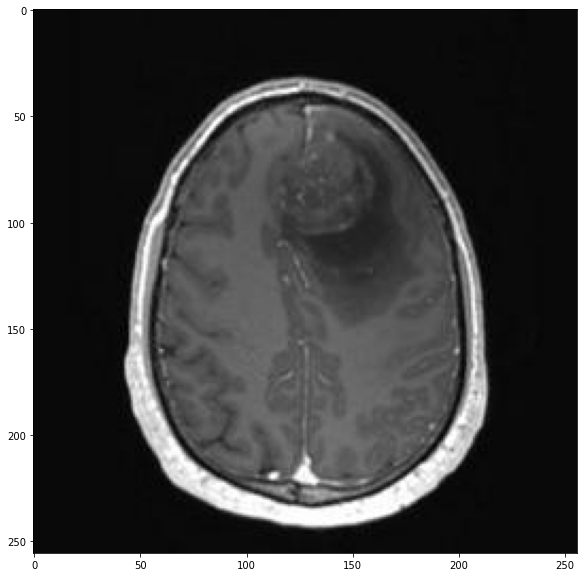

In [ ]:
img_plot = amostra
img = cv2.imread(img_plot)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot()
plt.imshow(img)


In [ ]:
import numpy as np

def n():
  pass

resultado_final = np.array(resultado_final)

print(f'Tumor com características de CAVERNOMA DE CORPO CALOSO (BENIGNO) - Probabilidade: {round(resultado_final[0,0]*10, 2)}%') if resultado_final[0,0] > 0.5 else n()
print(f'Tumor com características de EPENDIMOMA (BENIGNO) - Probabilidade: {round(resultado_final[0,1]*100, 2)}%') if resultado_final[0,1] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA ANGIOMATOSO (BENIGNO) - Probabilidade: {round(resultado_final[0,2]*100, 2)}%') if resultado_final[0,2] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA ATÍPICO (BENIGNO) - Probabilidade: {round(resultado_final[0,3]*100, 2)}%') if resultado_final[0,3] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA CÍSTICO (BENIGNO) - Probabilidade: {round(resultado_final[0,4]*100, 2)}%') if resultado_final[0,4] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA CORDÓIDE (BENIGNO) - Probabilidade: {round(resultado_final[0,5]*100, 2)}%') if resultado_final[0,5] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA EM FOICE (BENIGNO) - Probabilidade: {round(resultado_final[0,6]*100, 2)}%') if resultado_final[0,6] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA EM FOSSA CRANIANA ANTERIOR (BENIGNO) - Probabilidade: {round(resultado_final[0,7]*100, 2)}%') if resultado_final[0,7] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA EM FOSSA CRANIANA POSTERIOR (BENIGNO) - Probabilidade: {round(resultado_final[0,8]*100, 2)}%') if resultado_final[0,8] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA FRONTAL (BENIGNO) - Probabilidade: {round(resultado_final[0,9]*100, 2)}%') if resultado_final[0,9] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA INTRAVENTRICULAR (BENIGNO) - Probabilidade: {round(resultado_final[0,10]*10, 2)}%') if resultado_final[0,10] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA PETROCLIVAL (BENIGNO) - Probabilidade: {round(resultado_final[0,11]*100, 2)}%') if resultado_final[0,11] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA RABDÓIDE (BENIGNO) - Probabilidade: {round(resultado_final[0,12]*100, 2)}%') if resultado_final[0,12] > 0.5 else n()
print(f'Tumor com características de MENINGIOMA TRANSICIONAL (BENIGNO) - Probabilidade: {round(resultado_final[0,13]*100, 2)}%') if resultado_final[0,13] > 0.5 else n()
print(f'Tumor com características de NEUROCITOMA CENTRAL (BENIGNO) - Probabilidade: {round(resultado_final[0,14]*100, 2)}%') if resultado_final[0,14] > 0.5 else n()
print(f'Tumor com características de NEUROCITOMA EXTRAVENTRICULAR (BENIGNO) - Probabilidade: {round(resultado_final[0,15]*100, 2)}%') if resultado_final[0,15] > 0.5 else n()
print(f'Tumor com características de NEUROMA ACÚSTICO (BENIGNO) - Probabilidade: {round(resultado_final[0,16]*100, 2)}%') if resultado_final[0,16] > 0.5 else n()
print(f'Tumor com características de PAPILOMA EM PLEXO CORÓIDE (BENIGNO) - Probabilidade: {round(resultado_final[0,17]*100, 2)}%') if resultado_final[0,17] > 0.5 else n()
print(f'Tumor com características de SCHWANNOMA ACÚSTICO (BENIGNO) - Probabilidade: {round(resultado_final[0,18]*100, 2)}%') if resultado_final[0,18] > 0.5 else n()
print(f'Tumor com características de SCHWANNOMA TRIGEMINAL (BENIGNO) - Probabilidade: {round(resultado_final[0,19]*100, 2)}%') if resultado_final[0,19] > 0.5 else n()
print(f'Tumor com características de SCHWANNOMA VESTIBULAR (BENIGNO) - Probabilidade: {round(resultado_final[0,20]*10, 2)}%') if resultado_final[0,20] > 0.5 else n()
print(f'Tumor com características de ASTROCITOMA ANAPLÁSICO (MALIGNO) - Probabilidade: {round(resultado_final[0,21]*100, 2)}%') if resultado_final[0,21] > 0.5 else n()
print(f'Tumor com características de ASTROCITOMA PILOCÍTICO (MALIGNO) - Probabilidade: {round(resultado_final[0,22]*100, 2)}%') if resultado_final[0,22] > 0.5 else n()
print(f'Tumor com características de CARCINOMA BASOCELULAR (MALIGNO) - Probabilidade: {round(resultado_final[0,23]*100, 2)}%') if resultado_final[0,23] > 0.5 else n()
print(f'Tumor com características de CARCINOMA EM PLEXO CORÓIDE (MALIGNO) - Probabilidade: {round(resultado_final[0,24]*100, 2)}%') if resultado_final[0,24] > 0.5 else n()
print(f'Tumor com características de GANGLIOGLIOMA (MALIGNO) - Probabilidade: {round(resultado_final[0,25]*100, 2)}%') if resultado_final[0,25] > 0.5 else n()
print(f'Tumor com características de GANGLIOGLIOMA DESMOPLÁSICO (MALIGNO) - Probabilidade: {round(resultado_final[0,26]*100, 2)}%') if resultado_final[0,26] > 0.5 else n()
print(f'Tumor com características de GANGLIOGLIOMA TALÂMICO (MALIGNO) - Probabilidade: {round(resultado_final[0,27]*100, 2)}%') if resultado_final[0,27] > 0.5 else n()
print(f'Tumor com características de GLIOBLASTOMA (MALIGNO) - Probabilidade: {round(resultado_final[0,28]*100, 2)}%') if resultado_final[0,28] > 0.5 else n()
print(f'Tumor com características de GLIOMA DE ALTO GRAU (MALIGNO) - Probabilidade: {round(resultado_final[0,29]*100, 2)}%') if resultado_final[0,29] > 0.5 else n()
print(f'Tumor com características de GLIOMA DE BAIXO GRAU (MALIGNO) - Probabilidade: {round(resultado_final[0,30]*10, 2)}%') if resultado_final[0,30] > 0.5 else n()
print(f'Tumor com características de GLIOMA DE TRONCO ENCEFALICO (MALIGNO) - Probabilidade: {round(resultado_final[0,31]*100, 2)}%') if resultado_final[0,31] > 0.5 else n()
print(f'Tumor com características de GLIOMA PONTINO INTRÍNSECO (MALIGNO) - Probabilidade: {round(resultado_final[0,32]*100, 2)}%') if resultado_final[0,32] > 0.5 else n()
print(f'Tumor com características de GLIOMA TALÂMICO (MALIGNO) - Probabilidade: {round(resultado_final[0,33]*100, 2)}%') if resultado_final[0,33] > 0.5 else n()
print(f'Tumor com características de MEDULOBLASTOMA (MALIGNO) - Probabilidade: {round(resultado_final[0,34]*100, 2)}%') if resultado_final[0,34] > 0.5 else n()
print(f'Tumor com características de OLIGODENDROGLIOMA (MALIGNO) - Probabilidade: {round(resultado_final[0,35]*100, 2)}%') if resultado_final[0,35] > 0.5 else n()
print('_________________________________________________________________________________________________________________________________________________')
print('Resultado exibido em forma de probabilidade pois na imagem podem ser detectadas diferenças de densidades compatíveis com duas ou mais patologias.')
print('Sugere-se correlação com a história clínica do paciente e com outros tipos de exames para um diagnóstico final.')


Tumor com características de ASTROCITOMA ANAPLÁSICO (MALIGNO) - Probabilidade: 100.0%
_________________________________________________________________________________________________________________________________________________
Resultado exibido em forma de probabilidade pois na imagem podem ser detectadas diferenças de densidades compatíveis com duas ou mais patologias.
Sugere-se correlação com a história clínica do paciente e com outros tipos de exames para um diagnóstico final.
